## 1. 데이터 로드 및 전처리

### 1) 데이터 로드

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline

url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

df = pd.read_csv(url)
df.drop(columns='Unnamed: 0', inplace=True)

display(df.head())
print('\ndf shape : {}'.format(df.shape))

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04



df shape : (16598, 9)


In [142]:
print('Platform의 종류')
print(df.Platform.unique())

print('\nYear Span')
print(df.Year.unique())

print('\n장르 종류')
print(df.Genre.unique())

Platform의 종류
['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Year Span
[2.008e+03 2.009e+03 2.010e+03 2.005e+03 2.011e+03 2.007e+03 2.001e+03
 2.003e+03 2.006e+03 2.014e+03 2.015e+03 2.002e+03 1.997e+03 2.013e+03
 1.996e+03 2.004e+03 2.000e+03       nan 1.984e+03 1.998e+03 2.016e+03
 1.985e+03 1.999e+03 9.000e+00 9.700e+01 1.995e+03 1.993e+03 2.012e+03
 1.987e+03 1.982e+03 1.100e+01 1.994e+03 1.990e+03 1.500e+01 1.992e+03
 1.991e+03 1.983e+03 1.988e+03 1.981e+03 3.000e+00 1.989e+03 9.600e+01
 6.000e+00 8.000e+00 1.986e+03 1.000e+00 5.000e+00 4.000e+00 1.000e+01
 9.800e+01 7.000e+00 1.600e+01 8.600e+01 1.400e+01 9.500e+01 2.017e+03
 1.980e+03 2.020e+03 2.000e+00 1.300e+01 0.000e+00 1.200e+01 9.400e+01]

장르 종류
['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter' nan]


### 2) 결측치 처리





In [3]:
# 게임 발매 년도의 결측치가 가장 많은 것을 알 수 있다.

print(' [ Missing Data ] ')
display(df.isnull().sum())

print('\n\n [ Data Types ] ')
display(df.dtypes)

 [ Missing Data ] 


Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64



 [ Data Types ] 


Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [ ]:
# 결측치를 채울 함수 호출을 위한 패키지 설치

! pip3 install selenium
! sudo apt-get install chromium-chromedriver

In [7]:
# find.py 안에 fill_year라는 함수를 만들어서 호출
# fill_year는 selenium으로 구글에서 Year 컬럼이 없는 값들의 출시년도를 검색 후, 게임이름과 출시년도가 쌍으로 된 dictionary 반환

from find import fill_year

y_df = df[df.Year.isnull() == True].iloc[:, :2]

y_dict1 = fill_year(y_df, 30)

In [ ]:
# y_dict1를 잘 산출했는지 확인

y_dict1

In [9]:
# Year 결측치를 채우기위한 조건을 설정하고, 조건에 맞는 값들을 y_dict2에 맞게 수정

condition = (df.Name.isin(y_dict1.keys())==True) & (df.Year.isnull()==True)

df.Year[condition] = df.Name[condition].map(y_dict1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
# fill_year 함수를 통해서도 채우지 못한 30개의 값이 존재

df.Year.isnull().sum()

30

In [11]:
# 남아있는 30개의 결측치 제거

df.drop(df[df.Year.isna() == True].index, inplace=True)

In [12]:
# Year 결측치 최종확인

df.Year.isnull().sum()

0

In [13]:
# Year 컬럼을 int형으로 변환

df.Year = df.Year.astype('int')

In [14]:
# Year 컬럼을 이루고 있는 값들 확인

df.Year.value_counts()

2008    1444
2009    1436
2010    1271
2007    1210
2011    1165
        ... 
13         2
2020       2
94         1
1976       1
86         1
Name: Year, Length: 65, dtype: int64

In [15]:
# 한 자리 혹은 두 자리수로 이루어진 Year값들을 제대로된 연도 표기법으로 바꾸기 위한 리스트 선언

y_list = df.Year[(df.Year < 100)].unique()
y_list

array([ 9, 97, 11, 15,  3, 96,  6,  8,  1,  5,  4, 10, 98,  7, 16, 86, 14,
       95,  2, 13,  0, 12, 94])

In [16]:
# Year 의 모든 자리수를 맞춰줄 기준점으로 y_dict2 선언

y_list.sort()
y_dict2 = dict()

for year in y_list:
    if year < 20:
        if len(str(year)) == 1:
            y_dict2[year] = int('200' + str(year))
        else:
            y_dict2[year] = int('20' + str(year))
    else:
        y_dict2[year] = int('19' + str(year))

print(y_list)
print(y_dict2)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 86 94 95 96 97 98]
{0: 2000, 1: 2001, 2: 2002, 3: 2003, 4: 2004, 5: 2005, 6: 2006, 7: 2007, 8: 2008, 9: 2009, 10: 2010, 11: 2011, 12: 2012, 13: 2013, 14: 2014, 15: 2015, 16: 2016, 86: 1986, 94: 1994, 95: 1995, 96: 1996, 97: 1997, 98: 1998}


In [17]:
# df.Year에서 위에서 선언한 y_dict의 key에 해당하는 값들을 변환

condition = (df.Year.isin(y_dict2.keys())== True)

df.Year[condition] = df.Year[condition].map(y_dict2)
df.Year[condition]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


74       2009
81       1997
213      2011
304      2015
768      2003
         ... 
15985    1994
16103    2008
16149    2008
16394    2000
16482    1998
Name: Year, Length: 100, dtype: int64

In [ ]:
# 값이 제대로 변환되었는지 확인

df.Year.value_counts()

In [19]:
# Sales 항목의 자료형이 object이며, 중간중간 M 및 K라는 문자열이 있음을 확인.
# 확인된 문자열 별로 개수 파악

sales_df = df.iloc[:, -4:]

# 문자열 M을 포함하고 있는 값이 100개
print(sales_df.NA_Sales.str.contains('M').sum())

# 소문자 m은 0개
print(sales_df.NA_Sales.str.contains('m').sum())

# 문자열 K를 포함하고 있는 값이 100개
print(sales_df.NA_Sales.str.contains('K').sum())

# 소문자 k는 0개
print(sales_df.NA_Sales.str.contains('k').sum())

100
0
99
0


In [20]:
# 판매액의 계산을 위해 문자열은 지우고, 각 문자열이 의미하는 바를 수치적으로 반영하여 값 치환

import re

# 판매액의 기본단위가 m이므로 문자열 m은 지워도 무방 / K가 붙은 놈들은 1/1000배를 곱한 값으로 치환
for col in sales_df.columns:
    
    sales_df[col] = sales_df[col].map(lambda x: re.sub('M', '', x))
    
    k_condition = (sales_df[col].str.contains('K') == True)
    
    sales_df[col][k_condition] = sales_df[col][k_condition].map(lambda x : float(x.replace('K', '')) * 0.001)
    
    sales_df[col] = sales_df[col].astype('float32')

sales_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0.00,0.00,0.00
1,0.17,0.00,0.00,0.01
2,0.00,0.00,0.02,0.00
3,0.04,0.00,0.00,0.00
4,0.12,0.09,0.00,0.04
...,...,...,...,...
16593,0.15,0.04,0.00,0.01
16594,0.01,0.00,0.00,0.00
16595,0.44,0.19,0.03,0.13
16596,0.05,0.05,0.25,0.03


In [21]:
# 결과확인

sales_df.dtypes

NA_Sales       float32
EU_Sales       float32
JP_Sales       float32
Other_Sales    float32
dtype: object

In [22]:
# 기존의 Sales 항목들을 합한 Total_Sales 컬럼 생성

sales_df['Total_Sales'] = sales_df.sum(axis=1)
sales_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,0.04,0.00,0.00,0.00,0.04
1,0.17,0.00,0.00,0.01,0.18
2,0.00,0.00,0.02,0.00,0.02
3,0.04,0.00,0.00,0.00,0.04
4,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...
16593,0.15,0.04,0.00,0.01,0.20
16594,0.01,0.00,0.00,0.00,0.01
16595,0.44,0.19,0.03,0.13,0.79
16596,0.05,0.05,0.25,0.03,0.38


In [23]:
df.iloc[:, -4:] = sales_df.iloc[:, :-1]
df['Total_Sales'] = sales_df['Total_Sales']

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [24]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float32
EU_Sales       float32
JP_Sales       float32
Other_Sales    float32
Total_Sales    float32
dtype: object

## 2. 시각화

### 1) 연도별 게임 발매 수 및 연도별 게임 판매액 시각화

In [25]:
# 연도별 게임 개수 파악

# 우선 연도리스트 선언

y_list = df.Year.unique()
y_list.sort()
y_list

array([1976, 1977, 1978, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020])

In [26]:
year_cnt_dict = {}

for year in y_list:
    year_cnt_dict[year] = len(df[df.Year == year])

year_cnt_dict

{1976: 1,
 1977: 4,
 1978: 3,
 1980: 13,
 1981: 46,
 1982: 37,
 1983: 17,
 1984: 14,
 1985: 14,
 1986: 21,
 1987: 16,
 1988: 16,
 1989: 18,
 1990: 16,
 1991: 41,
 1992: 43,
 1993: 61,
 1994: 121,
 1995: 219,
 1996: 264,
 1997: 291,
 1998: 381,
 1999: 342,
 2000: 353,
 2001: 489,
 2002: 850,
 2003: 788,
 2004: 775,
 2005: 955,
 2006: 1028,
 2007: 1213,
 2008: 1454,
 2009: 1446,
 2010: 1278,
 2011: 1175,
 2012: 664,
 2013: 550,
 2014: 583,
 2015: 617,
 2016: 344,
 2017: 5,
 2020: 2}

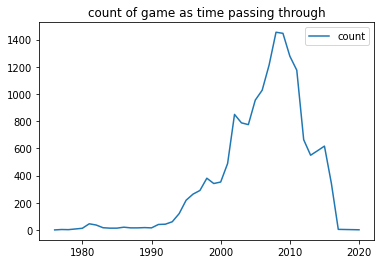

In [27]:
# 시간 흐름에 따른 게임 발매수 그래프

v_df = pd.DataFrame.from_dict(year_cnt_dict, orient='index', columns=['count'])
v_df.plot();
plt.title('count of game as time passing through');

In [28]:
year_sale_dict = dict()

for year in y_list:
    year_sale_dict[year] = df.Total_Sales[df.Year == year].sum()

year_sale_dict

{1976: 0.44,
 1977: 2.81,
 1978: 3.17,
 1980: 13.960001,
 1981: 35.68,
 1982: 29.35,
 1983: 16.8,
 1984: 50.350002,
 1985: 53.950005,
 1986: 37.08,
 1987: 21.7,
 1988: 47.379997,
 1989: 73.66,
 1990: 49.370003,
 1991: 32.23,
 1992: 76.14,
 1993: 46.0,
 1994: 79.22,
 1995: 88.11,
 1996: 199.23,
 1997: 202.3,
 1998: 257.83002,
 1999: 252.28,
 2000: 202.23001,
 2001: 335.39,
 2002: 403.94,
 2003: 368.25,
 2004: 421.71,
 2005: 465.39,
 2006: 526.74,
 2007: 612.62,
 2008: 690.57996,
 2009: 668.74,
 2010: 605.27997,
 2011: 527.86,
 2012: 363.68,
 2013: 368.83002,
 2014: 337.11,
 2015: 264.6,
 2016: 70.869995,
 2017: 1.0999999,
 2020: 1.9200001}

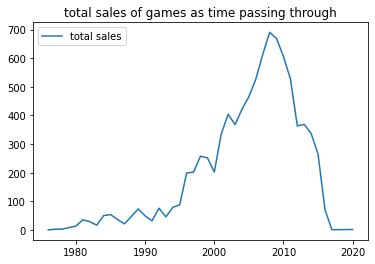

In [29]:
# 시간 흐름에 따른 연도별 게임 판매액 그래프

v2_df = pd.DataFrame.from_dict(year_sale_dict, orient='index', columns=['total sales'])
v2_df.plot();
plt.title('total sales of games as time passing through');

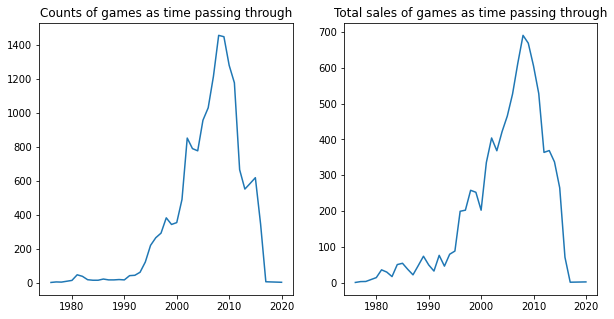

In [30]:
# 발매수 및 판매액 동시 비교
# 게임은 개별 단가에서 큰 차이가 없기 때문에, 연도에 따른 발매대수와 총 판매액이 거의 유사한 모습을 보인다.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(v_df);
ax1.set_title('Counts of games as time passing through');

ax2.plot(v2_df);
ax2.set_title('Total sales of games as time passing through');

### 2) 장르별 시각화

In [31]:
# 구글에서 게임 장르 검색결과를 가져오는 함수도 만들어 테스트 해봤지만, 원본 데이터에서 유지하고 있는 카테고리와는 성격이 달라서 배제
# 장르의 결측치가 적으니 제거

df.Genre.isnull().sum()

50

In [32]:
# 장르의 결측치 제거

df.drop(df[df.Genre.isna() == True].index, inplace=True)

In [33]:
df.Genre.isnull().sum()

0

In [34]:
df.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [35]:
from collections import defaultdict

year_genre_dict = defaultdict(list)

for year in y_list:
    g_list = []
    for genre in df.Genre.unique():
        condition = (df.Year == year) & (df.Genre == genre)
        g_list.append(df[condition].shape[0])
    year_genre_dict[year] = g_list

year_genre_dict

defaultdict(list,
            {1976: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
             1977: [2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
             1978: [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
             1980: [2, 1, 4, 0, 1, 0, 1, 0, 0, 0, 1, 2],
             1981: [25, 0, 0, 3, 4, 1, 1, 0, 2, 0, 0, 10],
             1982: [18, 0, 1, 5, 2, 0, 2, 0, 3, 0, 1, 5],
             1983: [7, 1, 1, 5, 1, 0, 0, 0, 1, 0, 0, 1],
             1984: [1, 0, 1, 1, 2, 0, 3, 0, 3, 0, 0, 3],
             1985: [2, 0, 0, 4, 1, 1, 0, 0, 4, 0, 1, 1],
             1986: [6, 0, 0, 6, 3, 0, 1, 1, 0, 0, 0, 4],
             1987: [2, 1, 0, 2, 4, 0, 0, 3, 0, 0, 2, 2],
             1988: [3, 0, 0, 4, 2, 1, 1, 3, 1, 0, 0, 1],
             1989: [3, 0, 1, 3, 3, 0, 0, 2, 5, 0, 0, 1],
             1990: [3, 0, 0, 3, 3, 1, 2, 2, 2, 0, 0, 0],
             1991: [5, 2, 1, 6, 7, 2, 1, 5, 4, 4, 1, 3],
             1992: [1, 4, 2, 6, 4, 1, 2, 5, 5, 3, 7, 3],
             1993: [7, 1, 3, 11, 9, 1, 2, 9, 3, 2, 11, 2],
        

In [39]:
v3_df = pd.DataFrame(year_genre_dict).T
v3_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
1976,0,0,0,0,0,0,0,0,1,0,0,0
1977,2,0,0,0,0,0,1,0,0,0,0,1
1978,1,0,0,0,0,0,0,0,1,0,0,1
1980,2,1,4,0,1,0,1,0,0,0,1,2
1981,25,0,0,3,4,1,1,0,2,0,0,10


In [41]:
v3_df.columns = df.Genre.unique()
v3_df.head()

,Action,Adventure,Misc,Platform,Sports,Simulation,Racing,Role-Playing,Puzzle,Strategy,Fighting,Shooter
1976,0,0,0,0,0,0,0,0,1,0,0,0
1977,2,0,0,0,0,0,1,0,0,0,0,1
1978,1,0,0,0,0,0,0,0,1,0,0,1
1980,2,1,4,0,1,0,1,0,0,0,1,2
1981,25,0,0,3,4,1,1,0,2,0,0,10


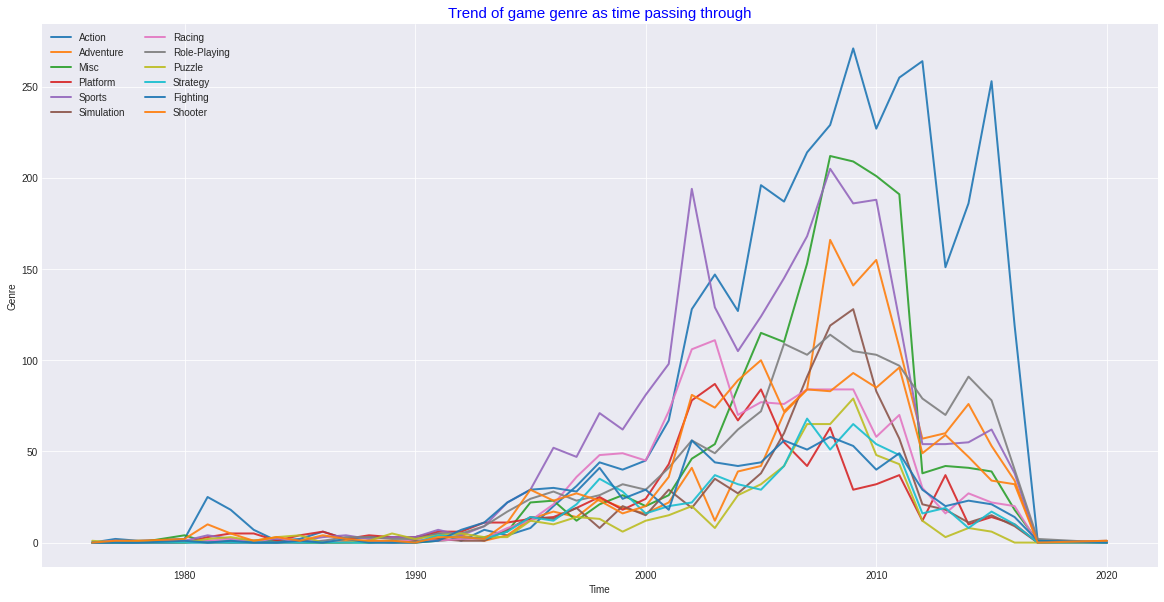

In [42]:
# 시간 흐름에 따른 게임 장르별 추세 시각화

from itertools import cycle

plt.style.use('seaborn-darkgrid')
 
# create a color palette

palette = cycle(sns.color_palette())

plt.figure(figsize=(20, 10))

# multiple line plot
for col in v3_df.columns:
    plt.plot(v3_df.index, v3_df[col], marker='', color=next(palette), linewidth=2, alpha=0.9, label=col);
 

plt.legend(loc=2, ncol=2);
 
plt.title("Trend of game genre as time passing through", fontsize=15, fontweight=0, color='blue');
plt.xlabel("Time");
plt.ylabel("Genre");

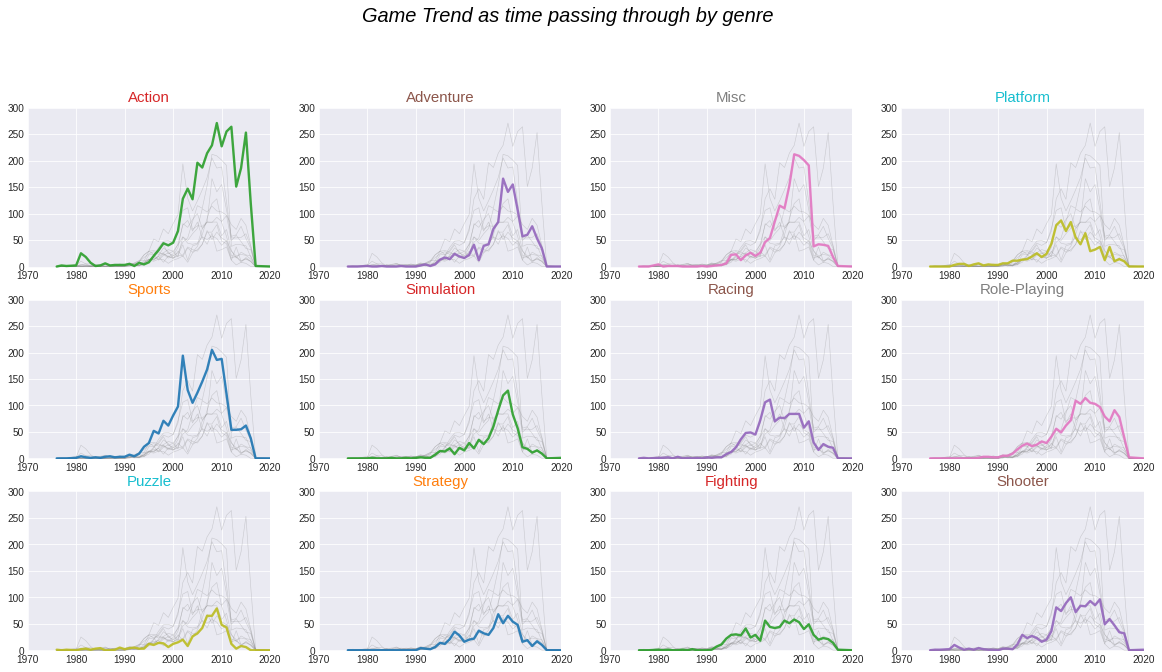

In [43]:
plt.figure(figsize=(20, 10))

for idx, col in enumerate(v3_df.columns, 1):
 
    # Find the right spot on the plot
    plt.subplot(3,4, idx)
    
    # plot every groups, but discreet
    for col2 in v3_df.columns:
        plt.plot(v3_df.index, v3_df[col2], marker='', color='grey', linewidth=0.6, alpha=0.3);
    
    # Plot the lineplot
    plt.plot(v3_df.index, v3_df[col], marker='', color=next(palette), linewidth=2.4, alpha=0.9, label=col);
 
    # Same limits for everybody!
    plt.xlim(1970, 2020);
    plt.ylim(-2, 300);
    
    # Not ticks everywhere
    if idx in range(8):
        plt.tick_params(labelbottom='off');
    if idx not in [0,4,8] :
        plt.tick_params(labelleft='off');
    
    # Add title
    plt.title(col, fontsize=15, fontweight=0, color=next(palette));

 
# general title
plt.suptitle("Game Trend as time passing through by genre", fontsize=20, fontweight=0, color='black', style='italic', y=1.02);


---
대부분의 게임이 2010년 가까이는 점차적으로 증가하다가
다시 감소하는 모습을 보인다.

이는 2010년 까지는 기술의 발전과 더불어 게임시장의 규모가 동반성장하는 모습을 보이다가
2010년을 기점으로 스마트폰의 발전과 스마트폰 기반 게임시장의 성장으로 시장점유율을 뺏겼기 때문으로 보인다.

실제로 아래의 모바일 게임시장의 시장가치 상승을 보면 기존 게임시장 매출액의 감소시기와 맞물리는 음의 상관관계를 지니고 있음을 보인다.

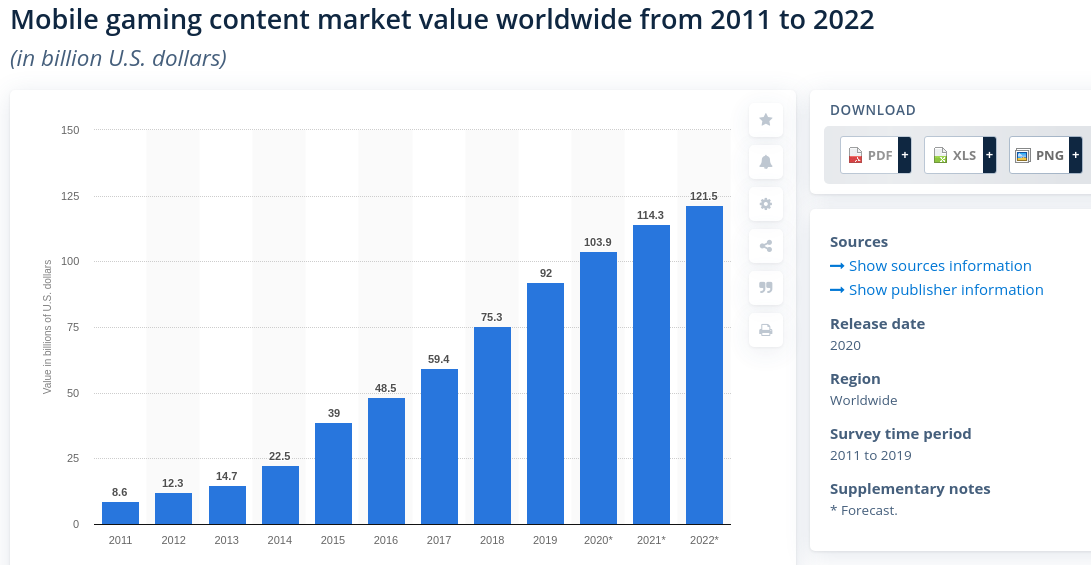

### 3) 지역에 따라 선호하는 게임장르

In [46]:
v4_df = df.groupby('Genre').sum()

v4_df = v4_df.iloc[:, 1:]
v4_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,874.549988,522.059998,157.830002,186.440002,1740.880005
Adventure,105.580002,64.029999,51.930000,16.809999,238.349991
Fighting,223.199997,101.220001,87.169998,36.639999,448.230011
Misc,402.980011,210.919998,105.230003,73.040001,792.169983
Platform,446.440002,201.130005,130.649994,51.529999,829.750000
Puzzle,123.150002,50.720001,56.869999,12.520000,243.259995
Racing,357.190002,237.100006,56.400002,77.099998,727.789978
Role-Playing,319.519989,183.580002,344.609985,56.919998,904.630005
Shooter,581.900024,313.049988,38.240002,102.650002,1035.839966


In [47]:
v4_df.shape

(12, 5)

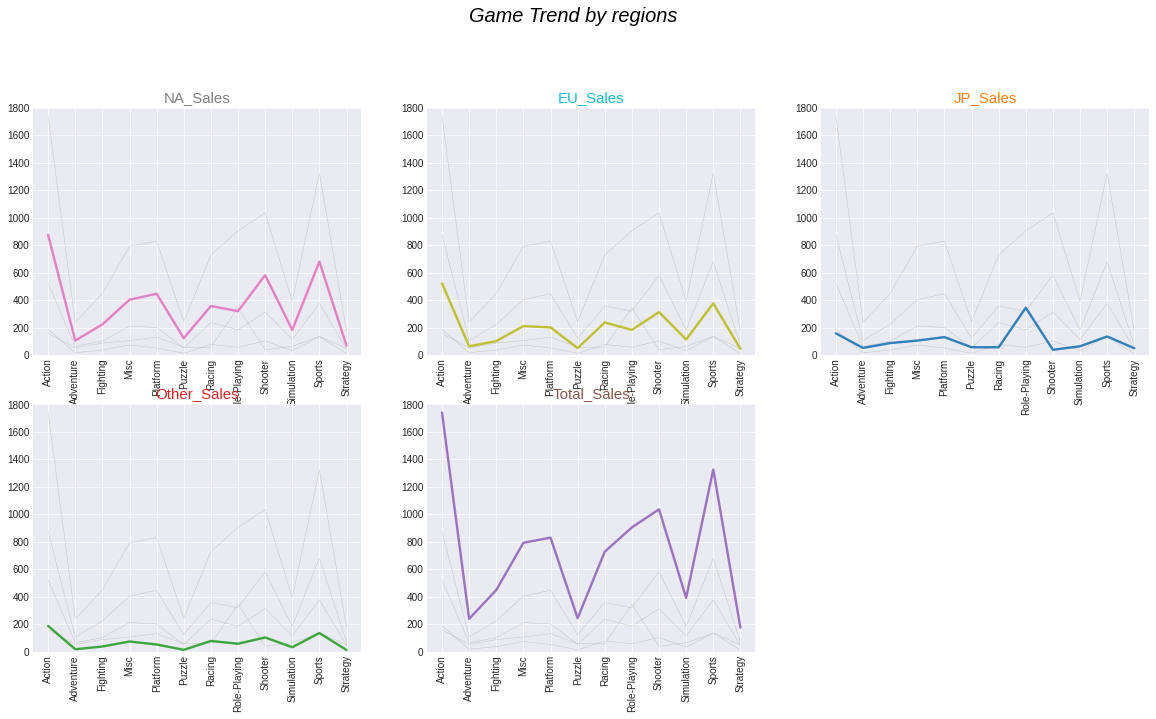

In [52]:
plt.figure(figsize=(20, 10))

for idx, col in enumerate(v4_df.columns, 1):
 
    # Find the right spot on the plot
    plt.subplot(2,3, idx)
    
    # plot every groups, but discreet
    for col2 in v4_df.columns:
        plt.plot(v4_df.index, v4_df[col2], marker='', color='grey', linewidth=0.6, alpha=0.3);
    
    # Plot the lineplot
    plt.plot(v4_df.index, v4_df[col], marker='', color=next(palette), linewidth=2.4, alpha=0.9, label=col);
 
    # Same limits for everybody!
    #plt.xlim(1970, 2020);
    plt.xticks(rotation=90)
    plt.ylim(0, 1800);
     
    
    # Add title
    plt.title(col, fontsize=15, fontweight=0, color=next(palette));

 
# general title
plt.suptitle("Game Trend by regions", fontsize=20, fontweight=0, color='black', style='italic', y=1.02);


In [ ]:
# 일본시장에서는 Role-Playing 게임의 인기가 높으며
# 다른 시장에서는 전반적으로 Action 장르가 인기인 것으로 보인다.

# 만일 Role-Playing게임을 개발한다면 일본시장을 타게팅해야 하고
# 액션 및 스포츠게임을 개발한다면 북미시장을 겨냥하는것이 바람직하다.

### 4) 게임 판매액 기준 상위 1000개 데이터 시각화

In [62]:
v5_df = df.sort_values(by=['Total_Sales'], ascending=False).iloc[:1000, :]
v5_df.head(10)


# 총 매출액별 순위에서 상위 10개 모두 Nintendo

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.490002,29.02,3.77,8.46,82.739998
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.080000,3.58,6.81,0.77,40.240002
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.850000,12.88,3.79,3.31,35.830002
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.750000,11.01,3.28,2.96,33.000000
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.270000,8.89,10.22,1.00,31.380001
1203,Tetris,GB,1989,Puzzle,Nintendo,23.200001,2.26,4.22,0.58,30.260000
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.380000,9.23,6.50,2.90,30.010000
3014,Wii Play,Wii,2006,Misc,Nintendo,14.030000,9.20,2.93,2.85,29.010000
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.590000,7.06,4.70,2.26,28.609999
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.930000,0.63,0.28,0.47,28.309999


In [66]:
v5_df.Publisher.value_counts()

Nintendo                                  229
Electronic Arts                           150
Sony Computer Entertainment                87
Activision                                 79
Ubisoft                                    53
Take-Two Interactive                       52
Microsoft Game Studios                     37
THQ                                        35
Konami Digital Entertainment               29
Sega                                       27
Capcom                                     26
Square Enix                                19
Warner Bros. Interactive Entertainment     17
LucasArts                                  15
Namco Bandai Games                         14
Eidos Interactive                          12
Atari                                      12
Disney Interactive Studios                 11
Bethesda Softworks                         10
SquareSoft                                  9
Midway Games                                7
Enix Corporation                  

In [103]:
# 상위 1000개중 publisher의 중복 출현 개수가 10개 미만인 것들을 ect로 치환

ect_list = v5_df.Publisher.value_counts()[(v5_df.Publisher.value_counts() < 10) == True].index
ect_dict = dict()

for p in v5_df.Publisher.unique():
    if p in ect_list:
        ect_dict[p] = 'ect'
    else:
        ect_dict[p] = p


print(ect_dict)

{'Nintendo': 'Nintendo', 'Microsoft Game Studios': 'Microsoft Game Studios', 'Take-Two Interactive': 'Take-Two Interactive', 'Sony Computer Entertainment': 'Sony Computer Entertainment', 'Activision': 'Activision', 'Ubisoft': 'Ubisoft', 'Bethesda Softworks': 'Bethesda Softworks', 'Electronic Arts': 'Electronic Arts', 'Sega': 'Sega', 'SquareSoft': 'ect', 'Atari': 'Atari', '505 Games': 'ect', 'Capcom': 'Capcom', 'GT Interactive': 'ect', 'Konami Digital Entertainment': 'Konami Digital Entertainment', 'Sony Computer Entertainment Europe': 'ect', 'Virgin Interactive': 'ect', 'LucasArts': 'LucasArts', 'Warner Bros. Interactive Entertainment': 'Warner Bros. Interactive Entertainment', 'Universal Interactive': 'ect', 'Square Enix': 'Square Enix', 'Eidos Interactive': 'Eidos Interactive', 'RedOctane': 'ect', 'Vivendi Games': 'ect', 'Enix Corporation': 'ect', 'Namco Bandai Games': 'Namco Bandai Games', 'Palcom': 'ect', 'Hasbro Interactive': 'ect', 'THQ': 'THQ', 'Fox Interactive': 'ect', 'Acclaim

In [106]:
v5_df.Publisher = v5_df.Publisher.map(ect_dict)
v5_df.Publisher.value_counts()

Nintendo                                  229
Electronic Arts                           150
Sony Computer Entertainment                87
ect                                        85
Activision                                 79
Ubisoft                                    53
Take-Two Interactive                       52
Microsoft Game Studios                     37
THQ                                        35
Konami Digital Entertainment               29
Sega                                       27
Capcom                                     26
Square Enix                                19
Warner Bros. Interactive Entertainment     17
LucasArts                                  15
Namco Bandai Games                         14
Atari                                      12
Eidos Interactive                          12
Disney Interactive Studios                 11
Bethesda Softworks                         10
Name: Publisher, dtype: int64

In [110]:
v6_df = v5_df.groupby(['Publisher']).sum().iloc[:, 1:]
v6_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,
Activision,208.419998,124.750000,5.110000,41.200001,379.480011
Atari,30.290001,5.770000,2.630000,1.970000,40.660000
Bethesda Softworks,23.910000,17.280001,1.010000,6.150000,48.349998
Capcom,27.930000,15.750000,30.539999,6.990000,81.209999
Disney Interactive Studios,14.870000,6.720000,0.140000,3.290000,25.020000
Eidos Interactive,20.170000,15.660000,4.530000,3.150000,43.509998
Electronic Arts,222.440002,185.610001,7.130000,64.379997,479.559998
Konami Digital Entertainment,26.850000,27.900000,16.160000,15.900000,86.809998
LucasArts,25.160000,14.360000,0.130000,4.440000,44.090000


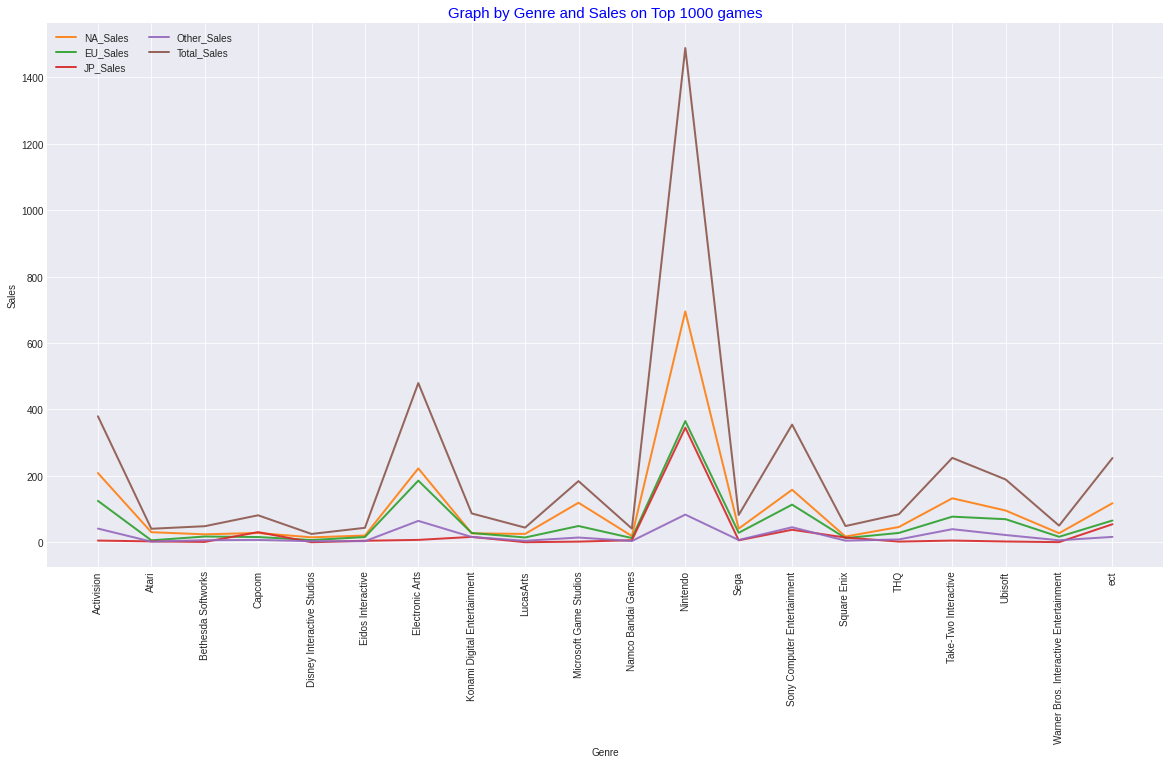

In [116]:
plt.figure(figsize=(20, 10))

# multiple line plot
for col in v6_df.columns:
    plt.plot(v6_df.index, v6_df[col], marker='', color=next(palette), linewidth=2, alpha=0.9, label=col);
 

plt.legend(loc=2, ncol=2);
 
plt.title("Graph by Genre and Sales on Top 1000 games", fontsize=15, fontweight=0, color='blue');
plt.xlabel("Genre");
plt.ylabel("Sales");
plt.xticks(rotation=90);

In [ ]:
# 모든 곳에서 닌텐도가 압도적으로 높다.
# 거의 모든 곳에서 북미시장의 판매액이 높다.

# top-1000 게임으로 바라본 시장규모에서 두번째에 해당하는 Electronic Arts는 일본에서 인기가 별로 없는데,
# 이는 일본에서 스포츠 게임의 인기가 낮은 탓으로 보인다.

## 다음 분기 게임 설계 전략

### 1) 현재 시장의 전망 객관적 분석

위에서 시각화해서 살펴본 연도별 게임 발매 수 및 판매액을 바탕으로

현재 기존 게임시장의 규모가 많이 작아졌음을 알 수 있다.

예시로 보였듯이 모바일 게임시장의 규모가 커지며 전체 게임시장 내에서

기존 게임들의 입지가 좁아졌다.


이미 스마트폰의 보급이 전세계적으로 널리 이루어진 상황에서 기존의 전략만으로는 이익을 창출하기 어려운 것이 일반적인 시각이다.

### 2) 선택과 집중

그럼에도 기존 게임시장의 니즈는 존재한다.

모바일 게임이 제공할 수 없는 니즈의 한계를 기존 게임에서는 제공하고 있기 때문이다.


입지가 좁아진 상황에서라도 이익을 만들어 내기 위해서는 선택과 집중이 필수적이다.

우선 지역별 게임시장의 규모를 살펴봤을 때, 북미 시장의 규모가 가장 거대하며,

북미 고객들은 Action과 Sports 장르의 게임을 선호한다.

그중에서도 Action 게임은 전세계적으로도 가장 인기있는 장르이다.

그러므로 가장 안전한 이익보장을 위해서는 Action 게임 개발하는 것이 바람직하다고 판단된다.